# Part 1

## import lib & data

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [12]:
path = r'/Users/tayen/Documents/CF/Instacart Basket Analysis'

In [13]:
ord_prod_cust = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_final.pickle'))

## step 2 address PII data

In [27]:
ord_prod_cust.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge1', 'product_name', 'aisle_id', 'department_id',
       'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'user_loyalty', 'avg_spending',
       'spending_range', 'med_days_since', 'user_frequency', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'name',
       'region', 'user_activity', 'user_profiling'],
      dtype='object')

In [5]:
# with state,age and name together, each row could lead to a personal indentifier, so drop the name here.
anonymized_data = ord_prod_cust.drop('name', axis = 1)

In [6]:
anonymized_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge1,...,spending_range,med_days_since,user_frequency,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Low spender,20.5,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Low spender,20.5,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Low spender,20.5,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Low spender,20.5,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Low spender,20.5,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423


## step 3 create regions

In [7]:
ord_prod_cust['state'].head()

0    Alabama
1    Alabama
2    Alabama
3    Alabama
4    Alabama
Name: state, dtype: object

In [14]:
# create region state list
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey',]
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [15]:
# for loop create a region result
region = []
for value in ord_prod_cust['state']:
    if value in Northeast:
        region.append('Northeast')
    elif value in Midwest:
        region.append('Midwest')
    elif value in South:
        region.append('South')
    elif value in West:
        region.append('West')
    else:
        region.append('Other')

In [16]:
ord_prod_cust['region'] = region

In [11]:
ord_prod_cust['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## step 4 create user activity label

In [12]:
ord_prod_cust['max_order'] = ord_prod_cust.groupby(['user_id'])['order_number'].transform(np.max)

In [13]:
ord_prod_cust['max_order'].value_counts( dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: max_order, Length: 99, dtype: int64

In [14]:
ord_prod_cust.loc[ord_prod_cust['max_order'] < 5,'user_activity'] = 'low_activity'

In [15]:
ord_prod_cust.loc[ord_prod_cust['max_order'] >= 5,'user_activity'] = 'regular_activity'

In [16]:
# filter out low activity user
reg_active_user = ord_prod_cust[ord_prod_cust['user_activity'] == 'regular_activity']

In [17]:
reg_active_user.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge1,...,gender,state,age,date_joined,n_dependants,fam_status,income,name,region,user_activity
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,South,regular_activity
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,South,regular_activity
2,473747,1,3,3,12,21.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,South,regular_activity
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,South,regular_activity
4,431534,1,5,4,15,28.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,South,regular_activity


In [18]:
# export the data
reg_active_user.to_pickle(os.path.join(path,'02 Data','Prepared Data','reg_active_user.pickle'))

## step 5 profiling variable

In [19]:
# single adult
ord_prod_cust.loc[(ord_prod_cust['age'] >= 18) & ((ord_prod_cust['fam_status'] == 'single') | (ord_prod_cust['fam_status'] == 'divorced/widowed')) & (ord_prod_cust['n_dependants'] == 0), 'user_profiling'] = 'single adult'

In [20]:
# multi-kids family
ord_prod_cust.loc[(ord_prod_cust['fam_status'] == 'married') & (ord_prod_cust['n_dependants'] >= 2), 'user_profiling'] = 'multi-kids'

In [21]:
# young parents
ord_prod_cust.loc[(ord_prod_cust['age'] < 35) & (ord_prod_cust['fam_status'] == 'married') & (ord_prod_cust['n_dependants'] == 1), 'user_profiling'] = 'young parents'

In [22]:
# single-kids family
ord_prod_cust.loc[(ord_prod_cust['age'] >= 35) & (ord_prod_cust['fam_status'] == 'married') & (ord_prod_cust['n_dependants'] == 1), 'user_profiling'] = 'single kid'

In [23]:
# live with family
ord_prod_cust.loc[ord_prod_cust['fam_status'] == 'living with parents and siblings', 'user_profiling'] = 'live with family'

In [24]:
ord_prod_cust['user_profiling'].value_counts(dropna = False)

multi-kids          15205849
single adult         8097503
single kid           5937422
young parents        1613482
live with family     1550603
Name: user_profiling, dtype: int64

## step 6 user profilling distribution

In [10]:
user_profilling_hist = sns.histplot(data = ord_prod_cust['user_profiling'])

KeyError: 'user_profiling'

## step 7 user profilling insights

In [28]:
#use_frequency and prices describe data across user profilling
ord_prod_cust.groupby(['user_profiling']).agg({'prices':['max','mean','min'],'order_number':['max','mean','min'],'days_since_prior_order':['max','mean','min']})

prices                order_number                 \
                    max      mean  min          max       mean min   
user_profiling                                                       
live with family   25.0  7.800712  1.0           99  17.296372   1   
multi-kids         25.0  7.788203  1.0           99  17.106120   1   
single adult       25.0  7.789975  1.0           99  17.264622   1   
single kid         25.0  7.796624  1.0           99  17.063279   1   
young parents      25.0  7.792355  1.0           99  17.012190   1   

                 days_since_prior_order                  
                                    max       mean  min  
user_profiling                                           
live with family                   30.0  11.048170  0.0  
multi-kids                         30.0  11.117681  0.0  
single adult                       30.0  11.080805  0.0  
single kid                         30.0  11.100799  0.0  
young parents                      30.0  11.158568  0.0

## step 8 regions & department insights

In [41]:
#regions
ord_prod_cust.groupby(['region']).agg({'prices':['max','mean','min','median'],'order_number':['max','mean','min','median'],'days_since_prior_order':['max','mean','min','median']})

prices                       order_number                        \
             max      mean  min median          max       mean min median   
region                                                                      
Midwest     25.0  7.792584  1.0    7.4           99  16.925132   1   11.0   
Northeast   25.0  7.782409  1.0    7.4           99  17.215730   1   11.0   
South       25.0  7.794918  1.0    7.4           99  17.150968   1   11.0   
West        25.0  7.790355  1.0    7.4           99  17.279318   1   11.0   

          days_since_prior_order                         
                             max       mean  min median  
region                                                   
Midwest                     30.0  11.181836  0.0    8.0  
Northeast                   30.0  11.075769  0.0    8.0  
South                       30.0  11.108108  0.0    8.0  
West                        30.0  11.047196  0.0    8.0

In [30]:
# department 
ord_prod_cust.groupby(['department_id']).agg({'prices':['max','mean','min'],'order_number':['max','mean','min'],'days_since_prior_order':['max','mean','min']})

prices                 order_number                 \
                 max       mean  min          max       mean min   
department_id                                                      
1               15.0   7.736553  1.0           99  15.457838   1   
2               15.0   6.990934  1.1           99  17.277920   1   
3               15.0   7.853809  1.0           99  17.170395   1   
4               15.0   7.981708  1.0           99  17.811403   1   
5               15.0   8.143701  1.0           99  15.215751   1   
6               15.0   7.682264  1.0           99  16.439806   1   
7               15.0   7.680502  1.0           99  17.225802   1   
8               15.0   7.889070  1.0           99  15.340650   1   
9               15.0   7.350283  1.0           99  15.895474   1   
10              14.1   8.348960  1.4           99  20.197148   1   
11              15.0   7.996769  1.0           99  16.170638   1   
12              25.0  16.294443  8.0           99  15.887671   1   
13              20.0   8.009443  1.0           99  16.583536   1   
14              14.9   8.028963  1.0           99  16.773669   1   
15              15.0   7.539976  1.0           99  16.165037   1   
16              15.0   8.335056  1.0           99  17.665606   1   
17              15.0   7.384058  1.0           99  15.694469   1   
18              15.0   7.638380  1.0           99  19.310397   1   
19               7.0   4.275437  1.6           99  17.177343   1   
20              15.0   7.778701  1.0           99  16.473447   1   
21              15.0   8.660716  1.0           99  22.902379   1   

              days_since_prior_order                  
                                 max       mean  min  
department_id                                         
1                               30.0  11.730829  0.0  
2                               30.0  10.952867  0.0  
3                               30.0  11.097613  0.0  
4                               30.0  10.856212  0.0  
5                               30.0  10.340887  0.0  
6                               30.0  11.291251  0.0  
7                               30.0  11.053389  0.0  
8                               30.0  11.867322  0.0  
9                               30.0  11.774450  0.0  
10                              30.0  10.104230  0.0  
11                              30.0  11.593145  0.0  
12                              30.0  11.432021  0.0  
13                              30.0  11.163256  0.0  
14                              30.0  11.296101  0.0  
15                              30.0  11.656079  0.0  
16                              30.0  10.986054  0.0  
17                              30.0  11.996490  0.0  
18                              30.0  10.004465  0.0  
19                              30.0  10.947879  0.0  
20                              30.0  11.345655  0.0  
21                              30.0  10.218559  0.0

### Midwest seems to shop less with on longer intervals

In [39]:
#crosstable
crosstab = pd.crosstab(ord_prod_cust['user_profiling'], ord_prod_cust['region'], dropna = False)

In [38]:
# paste crosstable to clipborad
crosstab.to_clipboard()

In [40]:
ord_prod_cust.shape

(32404859, 35)

## step 9

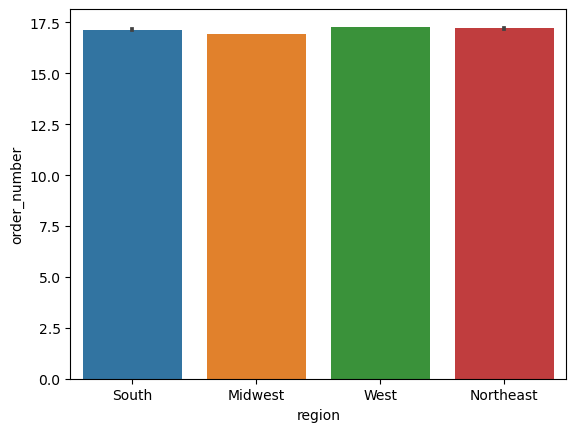

In [45]:
# region diferences
bar_user_profiling_price = sns.barplot( data = ord_prod_cust, x = 'region', y = 'order_number' )

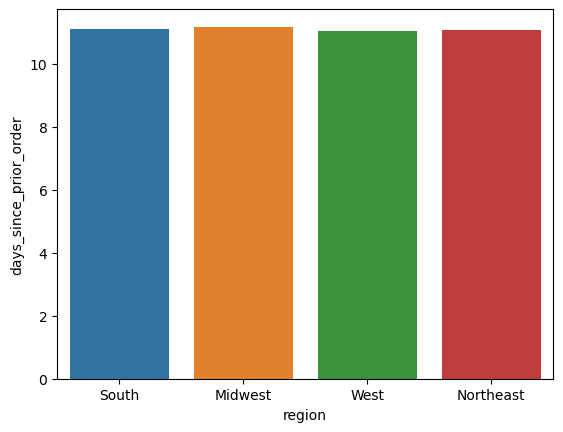

In [46]:
bar_user_profiling_frequency = sns.barplot( data = ord_prod_cust, x = 'region', y = 'days_since_prior_order' )

In [47]:
bar_region_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_user_profiling_price.png'))

In [48]:
bar_region_frequency.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_user_profiling_frequency.png'))

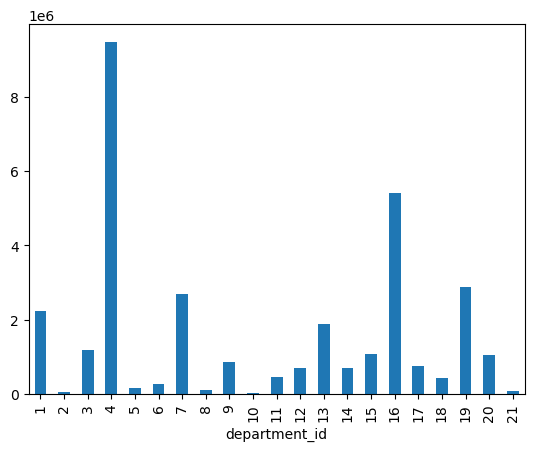

In [7]:
bar_department_orders = ord_prod_cust.groupby(['department_id'])['order_id'].count().plot.bar()

In [8]:
bar_department_orders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_department_orders.png'))

In [9]:
# user_profiling
bar_user_profiling_price = sns.barplot( data = ord_prod_cust, x = 'user_profiling', y = 'order_number' )

ValueError: Could not interpret input 'user_profiling'